In [437]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

data_raw = pd.read_csv('data.csv')
params = {}
with open('params.txt') as f:
    for line in f:
        b = line.split(' ')
        params[b[0]] = float(b[1])
              
data = pd.DataFrame(data=data_raw)
interest_a = 190
interest_b = 210
d = data[interest_a:interest_b] #19 30

dT = params['dT']
angle_ch_t_1 = params['steering_1_duration']
angle_ch_t_2 = params['steering_1_duration'] + params['steering_2_duration']

torque_ch_t_1 = params['torque_1_duration']
torque_ch_t_2 = params['torque_1_duration'] + params['torque_2_duration']
n = 1   # granularity
data


,x,y,t,torque,steering_angle,long_vel,lat_vel,yaw_angle,yaw_rate,slip_angle_f,slip_angle_r,norm_load_f,norm_load_r,slip_angle_est_f,slip_angle_est_r,lat_for_f,lat_for_r
0,0.000000,0.0000,0.00,0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6338.75,6338.75,0.000000,0.000000,0.000,0.000
1,0.000103,0.0000,0.00,200,0.0,0.010320,0.000000,0.000000,0.000000,0.000000,0.000000,6238.75,6438.75,0.000000,0.000000,0.000,0.000
2,0.000310,0.0000,0.01,200,0.0,0.020640,0.000000,0.000000,0.000000,0.000000,0.000000,6238.75,6438.75,0.000000,0.000000,0.000,0.000
3,0.000619,0.0000,0.02,200,0.0,0.030960,0.000000,0.000000,0.000000,0.000000,0.000000,6238.75,6438.75,0.000000,0.000000,0.000,0.000
4,0.001032,0.0000,0.03,200,0.0,0.041280,0.000000,0.000000,0.000000,0.000000,0.000000,6238.75,6438.75,0.000000,0.000000,0.000,0.000
5,0.001548,0.0000,0.04,200,0.0,0.051600,0.000000,0.000000,0.000000,0.000000,0.000000,6238.75,6438.75,0.000000,0.000000,0.000,0.000
6,0.002167,0.0000,0.05,200,0.0,0.061920,0.000000,0.000000,0.000000,0.000000,0.000000,6238.75,6438.75,0.000000,0.000000,0.000,0.000
7,0.002890,0.0000,0.06,200,0.0,0.072239,0.000000,0.000000,0.000000,0.000000,0.000000,6238.75,6438.75,0.000000,0.000000,0.000,0.000
8,0.003715,0.0000,0.07,200,0.0,0.082559,0.000000,0.000000,0.000000,0.000000,0.000000,6238.75,6438.75,0.000000,0.000000,0.000,0.000
9,0.004644,0.0000,0.08,200,0.0,0.092879,0.000000,0.000000,0.000000,0.000000,0.000000,6238.75,6438.75,0.000000,0.000000,0.000,0.000


In [438]:
change_1 = int(angle_ch_t_1/dT)
change_2 = int(angle_ch_t_2/dT)
change_1

500

Text(0.5, 1.0, 'y(t)')

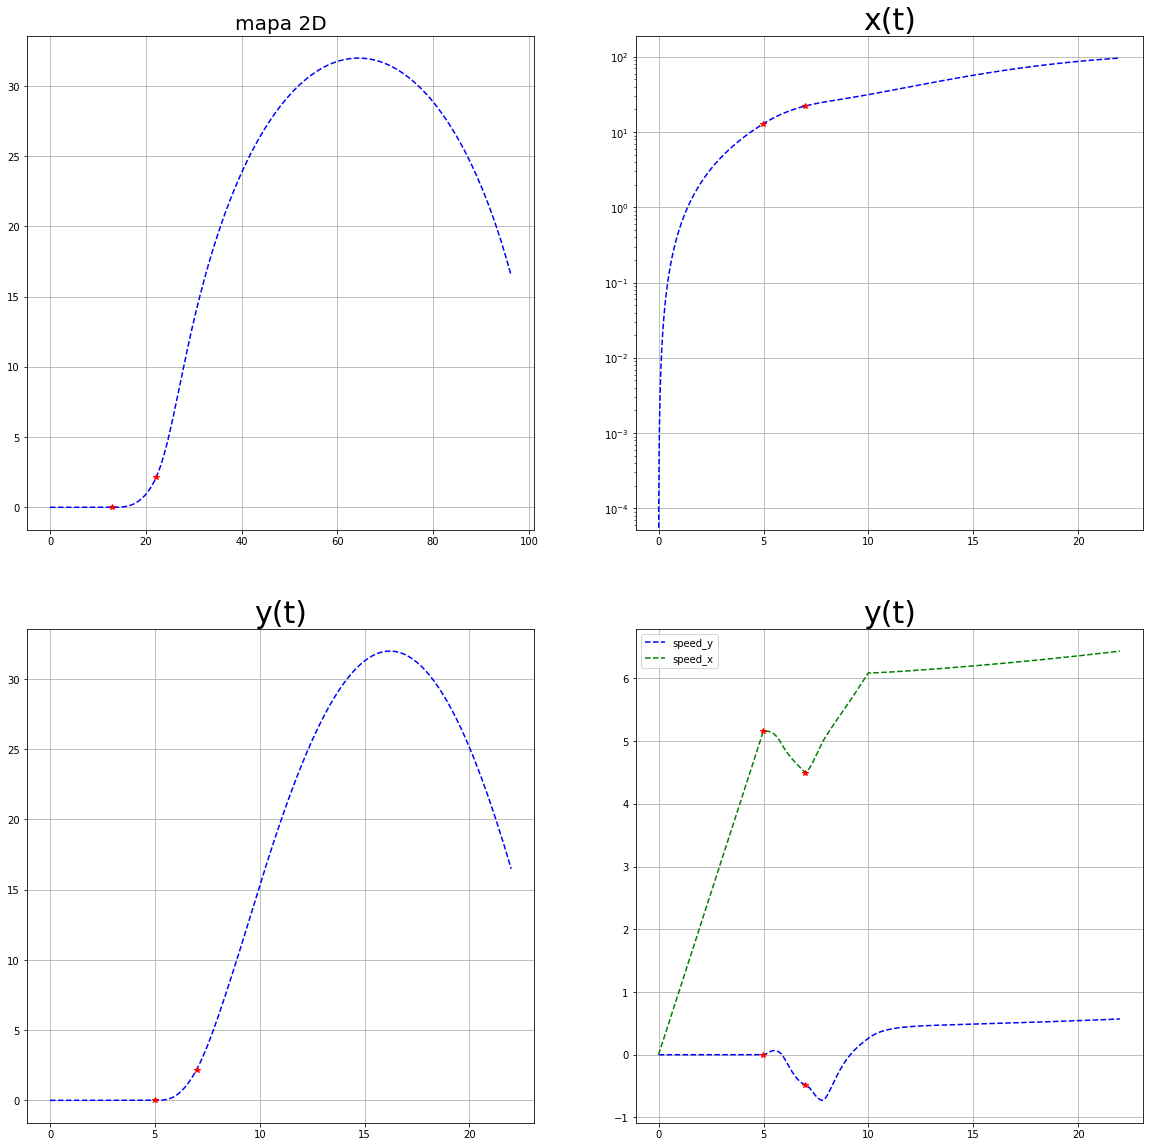

In [469]:
plt.figure(figsize=(20,20))

x = data['x']
y = data['y']
t = data['t']
speed_x = data['long_vel']
speed_y = data['lat_vel']

# mapa 2d
plt.subplot(221)
plt.plot(x, y, '--b', x[change_1], y[change_1], '*r', x[change_2], y[change_2], '*r')
plt.grid(True)
plt.title('mapa 2D', fontsize=20)


# x(t)
plt.subplot(222)
plt.plot(t, x, '--b', t[change_1], x[change_1], '*r', t[change_2], x[change_2], '*r')
plt.grid(True)
plt.title('x(t)', fontsize=30)
plt.yscale('log')


# y(t)
plt.subplot(223)
plt.plot(t, y, '--b', t[change_1], y[change_1], '*r', t[change_2], y[change_2], '*r')
plt.grid(True)
plt.title('y(t)', fontsize=30)

# speed
ax = plt.subplot(224)
ax.plot(t, speed_y, '--b', label='speed_y')
ax.plot(t[change_1], speed_y[change_1], '*r', t[change_2], speed_y[change_2], '*r')
ax.plot(t, speed_x, '--g', label='speed_x',)
ax.plot(t[change_1], speed_x[change_1], '*r', t[change_2], speed_x[change_2], '*r')
ax.grid(True)
ax.legend()
plt.title('y(t)', fontsize=30)


[]

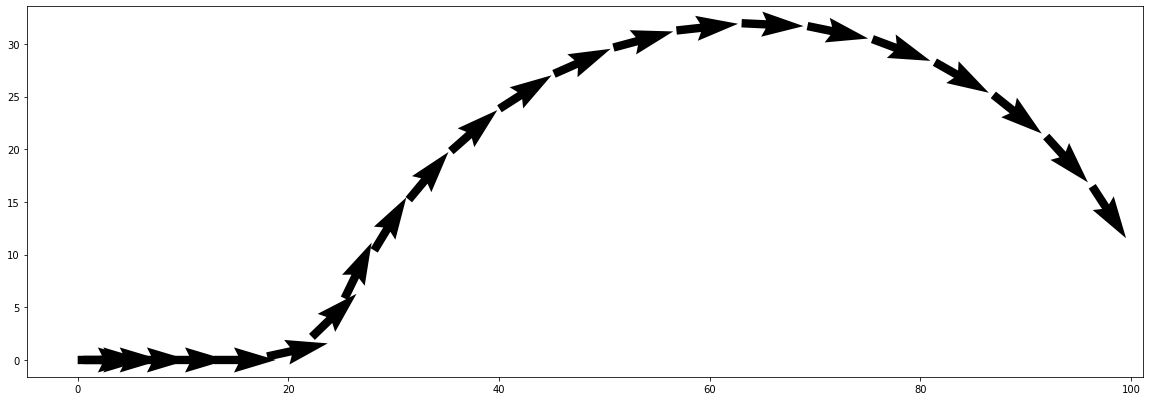

In [453]:
data_yaws = data['yaw_angle']
data_x = data['x']
data_y = data['y']
n = 100

x = data_x[::n]
y = data_y[::n]
u = np.cos(data_yaws)[::n]
v = np.sin(data_yaws)[::n]
#u = data['long_vel'][::100]
#v = data['lat_vel'][::100]

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax.set_aspect('equal')
plt.quiver(x,y, u,v)
plt.plot()

Text(0.5, 1.0, 'torque(t)')

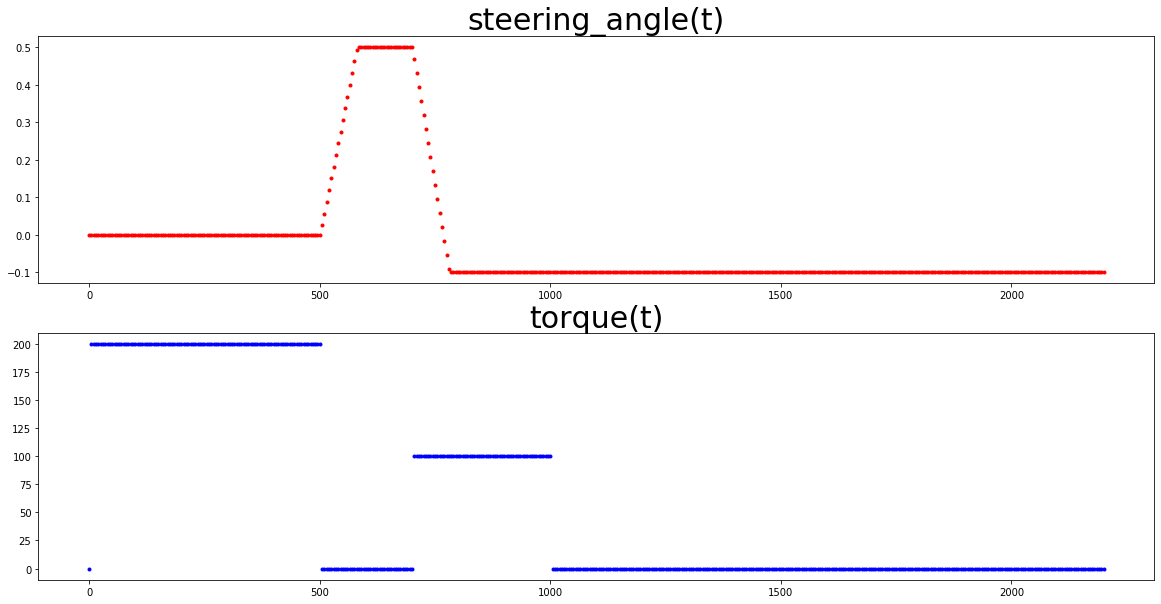

In [441]:
fig = plt.figure(figsize=(20,10))

plt.subplot(211)
plt.plot(data['steering_angle'][:][::5], '.r')
plt.title('steering_angle(t)', fontsize=30)

plt.subplot(212)
plt.plot(data['torque'][:][::5], '.b')
plt.title('torque(t)', fontsize=30)

Text(0.5, 1.0, 'kąt(t)')

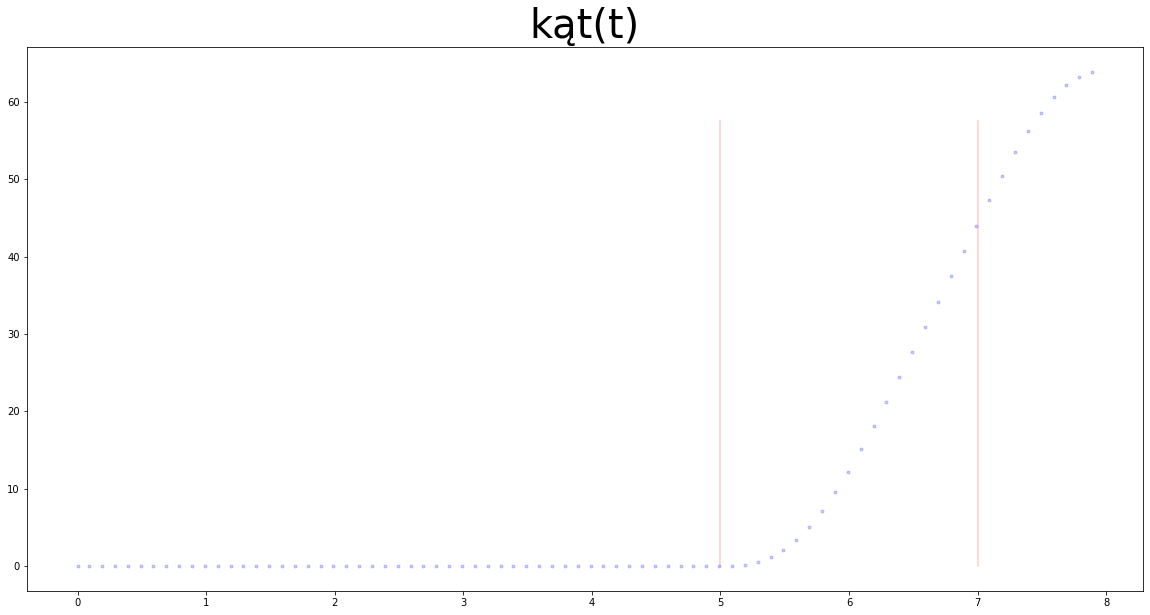

In [442]:
interest_a = 0
interest_b = 800
n = 10
yaw = np.rad2deg(np.unwrap(data['yaw_angle'][interest_a:interest_b][::n])) %360

max_yaw = np.max(yaw)
fig = plt.figure(figsize=(20,10))
plt.plot(data['t'][interest_a:interest_b][::n], yaw, '.b',\
         [angle_ch_t_1]*10, np.arange(0,max_yaw,max_yaw/10), '-r', \
         [angle_ch_t_2]*10, np.arange(0,max_yaw,max_yaw/10), '-r', alpha=0.2)
plt.title('kąt(t)', fontsize=40)

Text(0.5, 1.0, 'speed x and y')

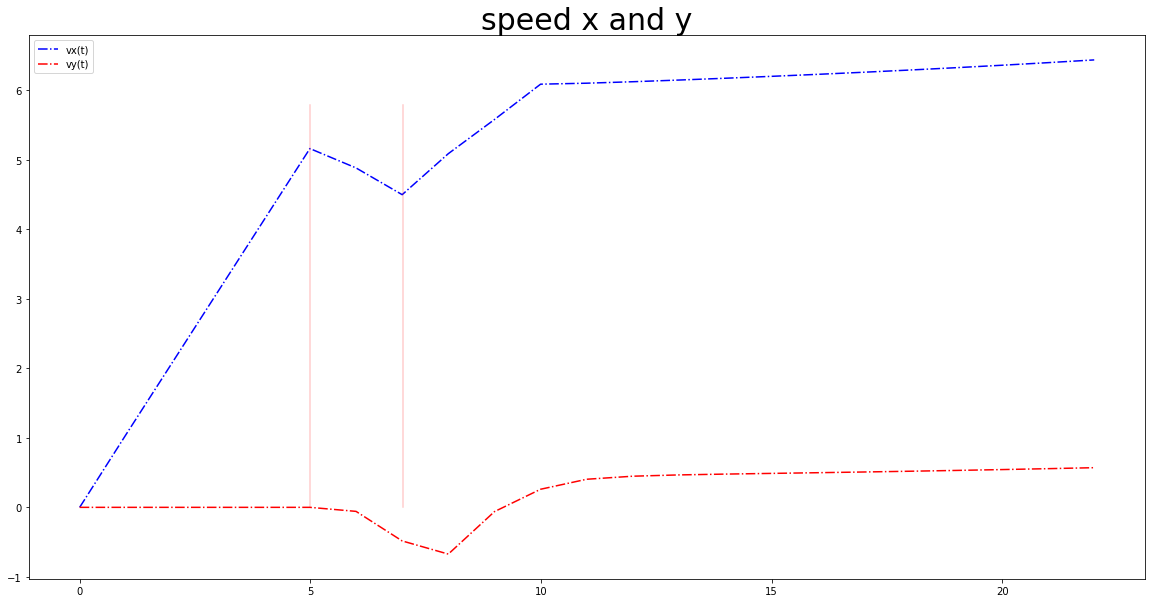

In [443]:
fig, ax = plt.subplots(figsize=(20,10))
max_speed = np.max([data['long_vel'], data['lat_vel']])
n = 100
ax.plot(data['t'][::n], data['long_vel'][::n], '-.b', label='vx(t)')
ax.plot(data['t'][::n], data['lat_vel'][::n], '-.r', label='vy(t)')
ax.plot([angle_ch_t_1]*10, np.arange(0,max_speed,max_speed/10), '-r', \
         [angle_ch_t_2]*10, np.arange(0,max_speed,max_speed/10), '-r', alpha=0.2)
leg = ax.legend();
plt.title('speed x and y', fontsize=30)

In [444]:
max_speed

6.4351400000000005

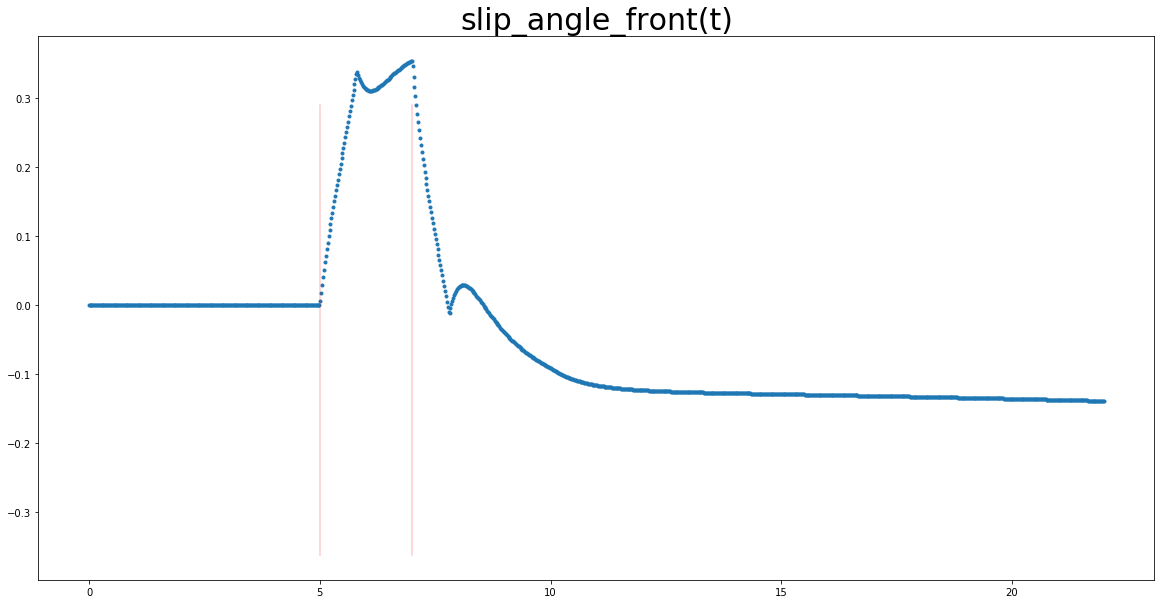

In [445]:
fig, ax = plt.subplots(figsize=(20,10))
slip_angle = data['slip_angle_f']
interest_a = 0
interest_b = 0
n = 2

max_slip = np.max([data['slip_angle_f'], data['slip_angle_r']])
ax.plot(data['t'][:][::n], slip_angle[:][::n], '.')
plt.title('slip_angle_front(t)', fontsize=30)
ax.plot([angle_ch_t_1]*10, np.arange(-max_slip,max_slip,max_slip/5), '-r', \
         [angle_ch_t_2]*10, np.arange(-max_slip,max_slip,max_slip/5), '-r', alpha=0.2)

Text(0.5, 1.0, 'vx^2 + vy^2')

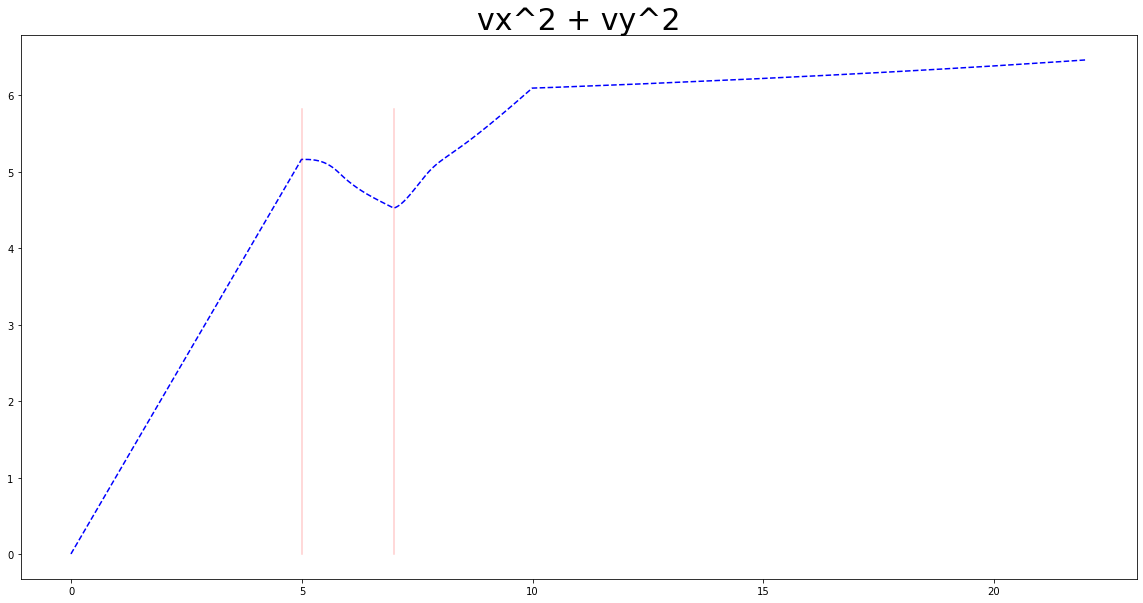

In [446]:
fig, ax = plt.subplots(figsize=(20,10))
energy_data = np.sqrt(data['long_vel'][:]**2 + data['lat_vel'][:]**2)
max_en = np.max(energy_data)

ax.plot(data['t'][:], energy_data, '--b')
ax.plot([angle_ch_t_1]*10, np.arange(0,max_en,max_en/10), '-r', \
         [angle_ch_t_2]*10, np.arange(0,max_en,max_en/10), '-r', alpha=0.2)
plt.title('vx^2 + vy^2', fontsize=30)

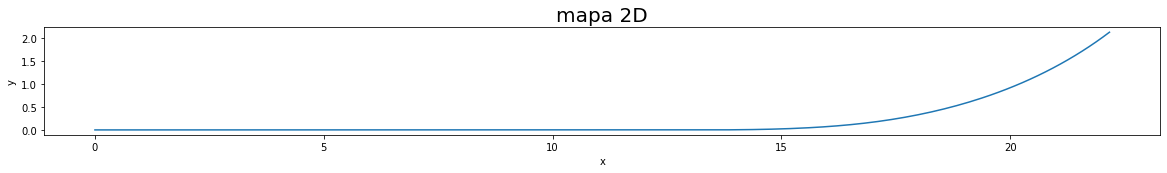

In [447]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax.set_aspect('equal')

interest_a = 0
interest_b = 700

plt.xlabel('x')
plt.ylabel('y')
plt.title('mapa 2D', fontsize=20)
#ax = plt.gca()
#ax.set_autoscale_on(False)

plt.plot(data['x'][interest_a:interest_b][::n], data['y'][interest_a:interest_b][::n])

Text(0.5, 1.0, 'x(t)')

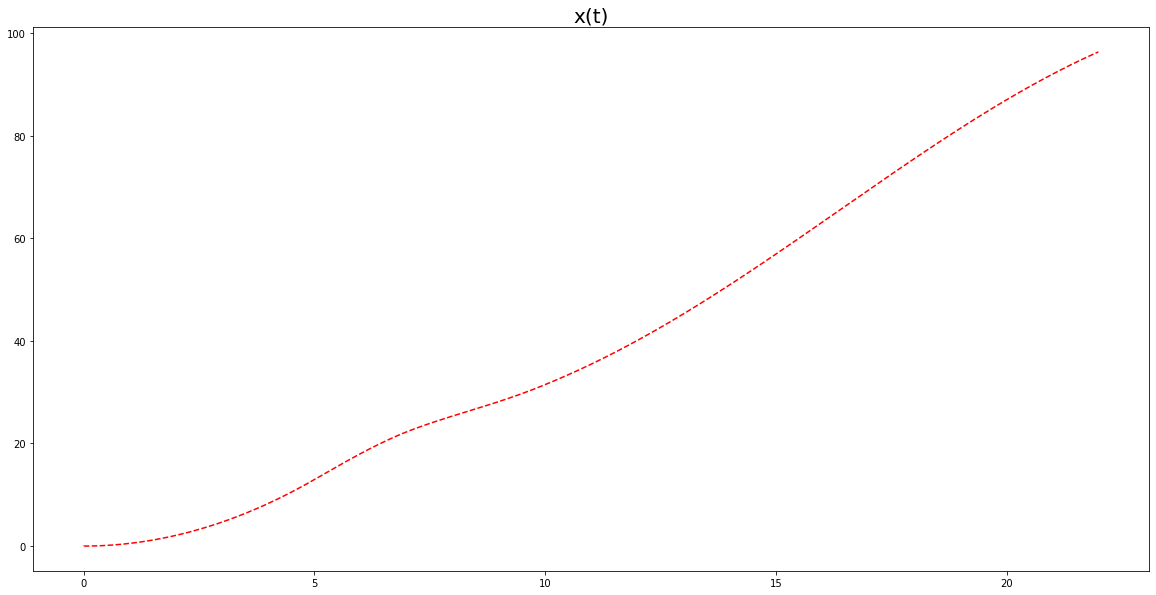

In [448]:
plt.figure(figsize=(20,10))
plt.plot(data['t'], data['x'], 'r--')
plt.title('x(t)', fontsize=20)

Text(0.5, 1.0, 'y(t)')

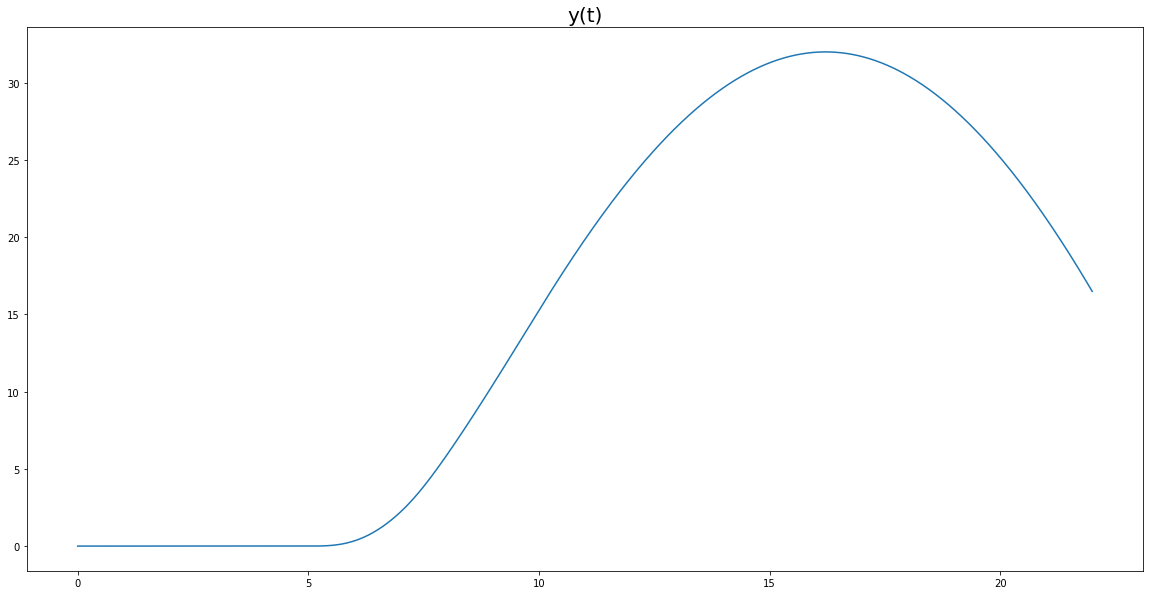

In [449]:
plt.figure(figsize=(20,10))
plt.plot(data['t'], data['y'])
plt.title('y(t)', fontsize=20)

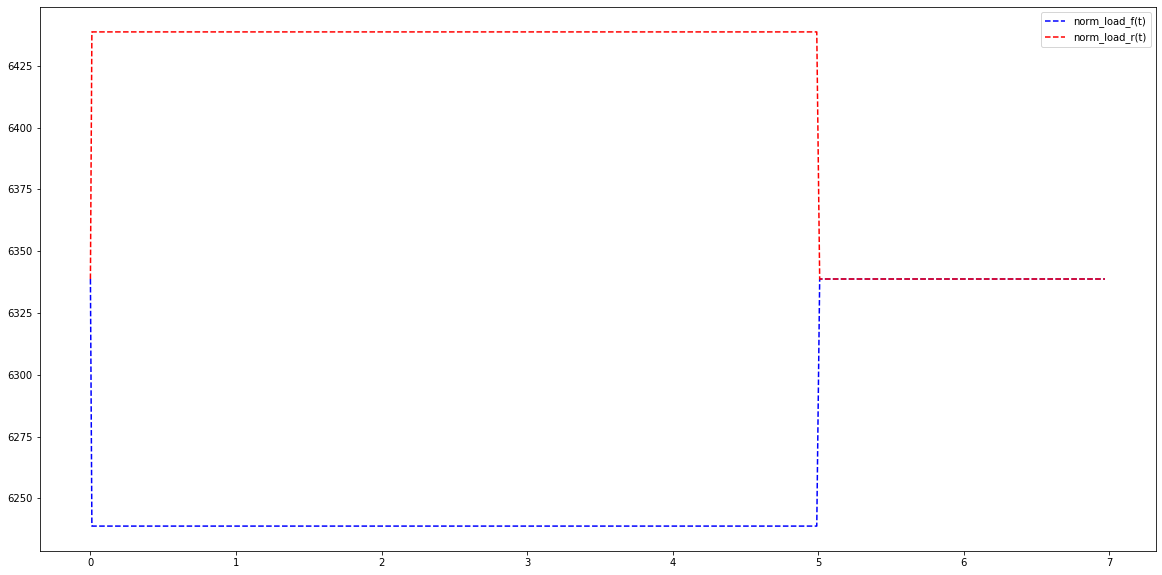

In [450]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(data['t'][interest_a:interest_b][::n], data['norm_load_f'][interest_a:interest_b][::n], '--b', label='norm_load_f(t)')
ax.plot(data['t'][interest_a:interest_b][::n], data['norm_load_r'][interest_a:interest_b][::n], '--r', label='norm_load_r(t)')
leg = ax.legend();

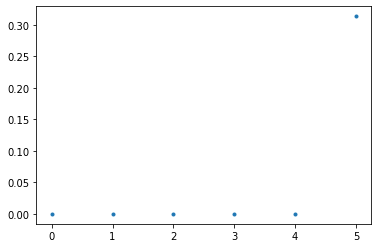

In [470]:
plt.plot(np.diff(slip_angle[interest_a:interest_b][::n]), '.')


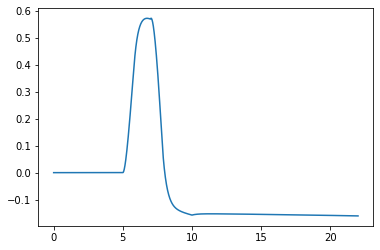

In [473]:
plt.plot(data['t'], data['yaw_rate'])

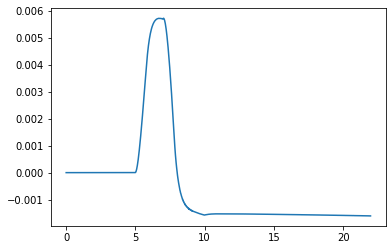

In [476]:
plt.plot(data['t'][:-1], np.diff(data['yaw_angle']))